In [5]:
import math
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = ["SimSun"]
plt.rcParams['axes.unicode_minus'] = False
import numpy as np
M1 = np.array([20000, 0, 2000])
f1 = np.array([17800, 0, 1800])
v_f1 = 120
v_M1 = 300
v_smoke = -3
g = 9.80655
fake_target = np.array([0,0,0])
true_target = np.array([0, 200, 5])  #此为质心，高为10，半径为7
true_target_R = 7
true_target_H = 10
smoke_R = 10
t_list = np.arange(0, 60, 0.005)
true_target_corner_1 = true_target - np.array([0, true_target_R, true_target_H / 2])
true_target_corner_2 = true_target - np.array([0, true_target_R, -true_target_H / 2])
true_target_corner_3 = true_target - np.array([0, -true_target_R, true_target_H / 2])
true_target_corner_4 = true_target - np.array([0, -true_target_R, -true_target_H / 2])
smoke_duration = 20  # 烟雾存续时间


退火优化进度:   0%|          | 0/8000 [00:00<?, ?it/s]

最优参数: [1.37529626e+02 1.20079171e-01 2.56324583e-01 4.65512441e-01]
最大遮挡总时间: 4.835


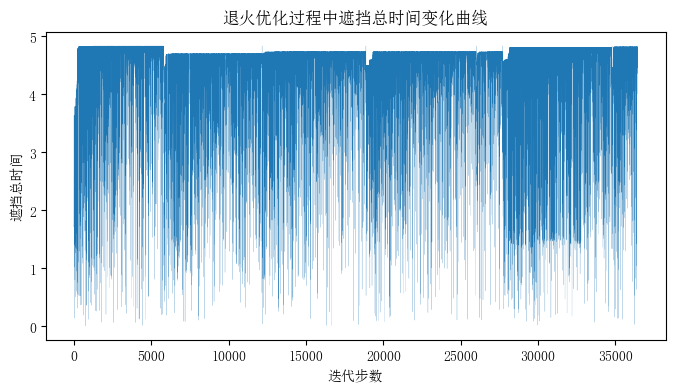

In [ ]:
from scipy.optimize import dual_annealing
import matplotlib.pyplot as plt
from calc_cover_time import *

# 优化目标函数
# x: [speed, angle, throw_time, burst_delay]
cover_time_hist = []
missile_traj = get_missile_traj(M1, fake_target, v_M1, t_list)
def sa_objective(x):
    global missile_traj
    position = f1  # 无人机初始点
    speed = x[0]
    direction_angle = x[1]
    throw_time = x[2]
    burst_delay = x[3]
    smoke_center = get_smoke_center(position, direction_angle, speed, throw_time, burst_delay, t_list)
    cover_time = get_missile_cover_time(smoke_center, missile_traj, true_target, smoke_R, t_list)
    cover_time_hist.append(cover_time)
    # 退火算法是最小化，这里返回负值
    return -cover_time

# 参数边界：[速度, 角度, 投弹时间, 爆炸间隔]
bounds = [(70, 140), (0, np.pi *2), (0, 60), (0.1, 5)]
from tqdm.notebook import tqdm
max_iter = 8000
pbar = tqdm(total=max_iter, desc="退火优化进度")

# 定义回调函数，每次迭代后更新进度条
def progress_callback(x, f, context):
    pbar.update(1)  # 每次迭代更新进度条
result = dual_annealing(
    func=sa_objective,
    bounds=bounds,
    maxiter=8000,
    seed=123,
    initial_temp=1000,
    callback=progress_callback

)

print('最优参数:', result.x)
print('最大遮挡总时间:', -result.fun)

plt.figure(figsize=(8,4))
plt.plot([cover_time_01 for cover_time_01 in cover_time_hist if cover_time_01 >0], linewidth=0.1, label='遮挡总时间')
plt.xlabel('迭代步数')
plt.ylabel('遮挡总时间')
plt.title('退火优化过程中遮挡总时间变化曲线')
plt.show()


In [8]:
smoke_center_val = get_smoke_center(f1, result.x[1], result.x[0], result.x[2], result.x[3], t_list)
get_missile_cover_time(smoke_center_val, missile_traj, true_target, smoke_R, t_list, debug=True)


遮挡区间: 0.74s ~ 5.57s
总遮挡时间: 4.83s


4.835

In [9]:
from scipy.optimize import dual_annealing
import matplotlib.pyplot as plt


true_target_corners = [true_target_corner_1, true_target_corner_2, true_target_corner_3, true_target_corner_4]
# 优化目标函数
# x: [speed, angle, throw_time, burst_delay]
cover_time_hist = []
missile_traj = get_missile_traj(M1, fake_target, v_M1, t_list)
def sa_objective(x):
    global missile_traj
    position = f1  # 无人机初始点
    speed = x[0]
    direction_angle = x[1]
    throw_time = x[2]
    burst_delay = x[3]
    smoke_center = get_smoke_center(position, direction_angle, speed, throw_time, burst_delay, t_list)
    cover_time = get_missile_cover_time_corners(smoke_center, missile_traj, true_target_corners, smoke_R, t_list)
    cover_time_hist.append(cover_time)
    # 退火算法是最小化，这里返回负值
    return -cover_time

# 参数边界：[速度, 角度, 投弹时间, 爆炸间隔]
bounds = [(70, 140), (0, 2*np.pi), (0, 60), (0.1, 5)]

from tqdm.notebook import tqdm
max_iter = 4000
pbar = tqdm(total=max_iter, desc="退火优化进度")

# 定义回调函数，每次迭代后更新进度条
def progress_callback(x, f, context):
    pbar.update(1)  # 每次迭代更新进度条


result = dual_annealing(
    func=sa_objective,
    bounds=bounds,
    maxiter=max_iter,
    seed=123,
    initial_temp=1000,
    callback=progress_callback,

)



退火优化进度:   0%|          | 0/4000 [00:00<?, ?it/s]

KeyboardInterrupt: 

最优参数: [1.34270581e+02 1.23763060e-01 1.87327965e-01 5.59039853e-01]
最大遮挡总时间: 4.59


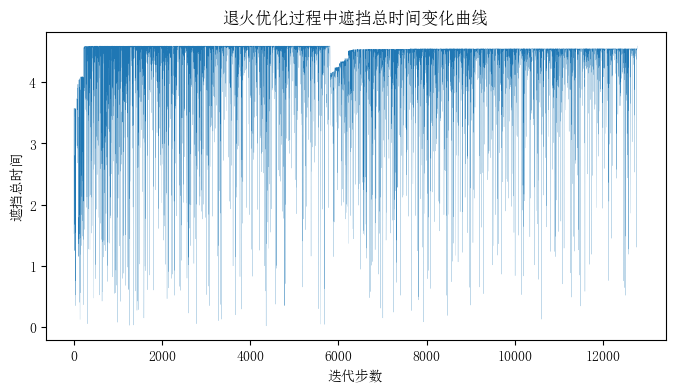

In [ ]:
print('最优参数:', result.x)
print('最大遮挡总时间:', -result.fun)

plt.figure(figsize=(8,4))
plt.plot([cover_time_01 for cover_time_01 in cover_time_hist[:22000] if cover_time_01 > 0], linewidth=0.1, label='遮挡总时间')
plt.xlabel('迭代步数')
plt.ylabel('遮挡总时间')
plt.title('退火优化过程中遮挡总时间变化曲线')
plt.show()

In [ ]:
smoke_center_val = get_smoke_center(f1, result.x[1], result.x[0], result.x[2], result.x[3], t_list)
get_missile_cover_time_corners(smoke_center_val, missile_traj, true_target_corners, smoke_R, t_list, debug=True)

遮挡区间: 0.82s ~ 5.41s
总遮挡时间: 4.59s


4.59

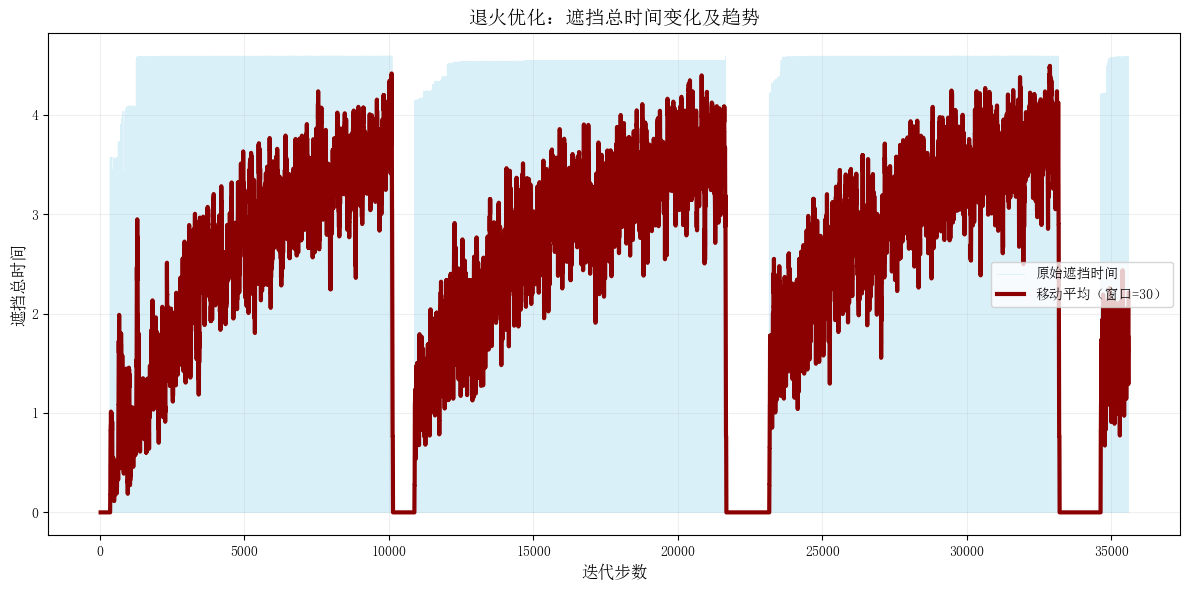

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 假设 cover_time_hist 是存储所有迭代遮挡时间的列表
ct_series = pd.Series(cover_time_hist)
window_size = 30  # 移动平均窗口大小，可根据数据密度调整
rolling_avg = ct_series.rolling(window=window_size).mean()

# 绘图
plt.figure(figsize=(12, 6))
# 原始数据：透明+细线，避免视觉拥挤
plt.plot(ct_series.index, ct_series.values, 
         color='skyblue', alpha=0.3, linewidth=0.5, 
         label='原始遮挡时间')
# 移动平均：粗线+醒目颜色，突出趋势
plt.plot(rolling_avg.index, rolling_avg.values, 
         color='darkred', linewidth=3, 
         label=f'移动平均（窗口={window_size}）')

# 美化细节
plt.xlabel('迭代步数', fontsize=12)
plt.ylabel('遮挡总时间', fontsize=12)
plt.title('退火优化：遮挡总时间变化及趋势', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.2)  # 浅网格增强可读性
plt.tight_layout()   # 自动调整布局
plt.show()